# Histograms, Probability Distributions with Numpy, Pandas, and Seaborn

Thus far, you have been working with what could best be called “frequency tables.” But mathematically, a histogram is a mapping of bins (intervals) to frequencies. More technically, it can be used to approximate the probability density function (PDF) of the underlying variable.

Moving on from the “frequency table” above, a true histogram first “bins” the range of values and then counts the number of values that fall into each bin. This is what NumPy’s histogram() function does, and it is the basis for other functions you’ll see here later in Python libraries such as Matplotlib and Pandas.

Consider a sample of floats drawn from the Normal distribution. 

### Histograms with numpy

In [3]:
import numpy as np

In [4]:
np.random.seed(444)
np.set_printoptions(precision=3)

distr_00 = np.random.normal(loc=100, scale=12, size=600)
distr_00[:5]

array([104.289, 104.53 , 116.588, 114.107,  88.729])

In [5]:
hist, bin_edges = np.histogram(distr_00)
hist

array([  3,  21,  24,  74, 138, 149,  94,  67,  22,   8])

In [6]:
bin_edges

array([ 60.363,  67.93 ,  75.498,  83.065,  90.632,  98.199, 105.766,
       113.333, 120.901, 128.468, 136.035])

In [7]:
hist.size, bin_edges.size

(10, 11)

In [8]:
first_edge, last_edge = bin_edges.min(), bin_edges.max()
first_edge, last_edge

(60.363140280458516, 136.03494544194604)

In [9]:
distr_00.min(), distr_00.max()

(60.363140280458516, 136.03494544194604)

(0.0, 90.0)

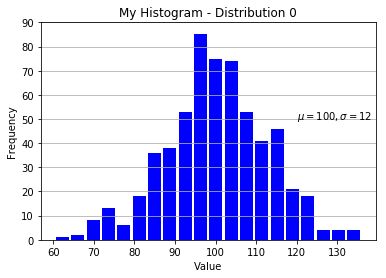

In [10]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(x=distr_00, bins='auto', color='blue', rwidth=0.85)
plt.grid(axis='y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Histogram - Distribution 0')
plt.text(120, 50, r'$\mu=100, \sigma=12$')
maxfreq = n.max()
plt.ylim(top=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


### Histograms with Pandas. Plotting a Kernel Density Estimate (KDE)

In [87]:
import pandas as pd
means = 83.7, 82.7, 79.3, 79.1, 70.5, 52.4
stdevs = 5.2, 5.2, 5.2, 5.1, 5.0, 4.8 
dist = pd.DataFrame(
    np.random.normal(loc=means, scale=stdevs, size=(2000, 6)),
    columns = ['Japan', 'Italy', 'USA', 'Cuba', 'Russia', 'Angola']
)
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

,Japan,Italy,USA,Cuba,Russia,Angola
min,67.46,63.45,60.86,59.93,52.83,30.63
max,103.19,101.36,94.81,96.32,87.70,68.65
mean,83.51,82.73,79.07,79.27,70.51,52.43
std,5.32,5.22,5.21,5.15,5.04,4.92


In this tutorial, you’ve been working with samples, statistically speaking. Whether the data is discrete or continuous, it’s assumed to be derived from a population that has a true, exact distribution described by just a few parameters.

A kernel density estimation (KDE) is a way to estimate the probability density function (PDF) of the random variable that “underlies” our sample. KDE is a means of data smoothing.

Using the Pandas library, you can create and overlay density plots using plot.kde(), which is available for both Series and DataFrame objects. 

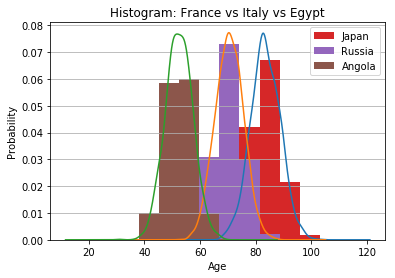

In [88]:
fig, ax = plt.subplots()
selected = dist.filter(['Japan','Russia','Angola'], axis=1)
selected.plot.kde(ax=ax, legend=False, title='Histogram: France vs Italy vs Egypt')
selected.plot.hist(density=True, ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Probability')
ax.grid(axis='y')


In [89]:
import seaborn as sns

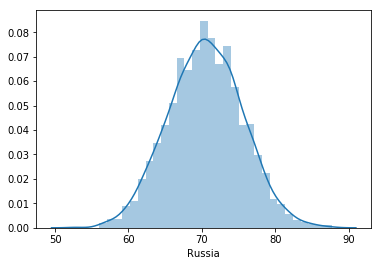

In [90]:
sns.distplot(dist['Russia'])

[Text(0, 0.5, 'Probability Density'), Text(0.5, 0, 'Country')]

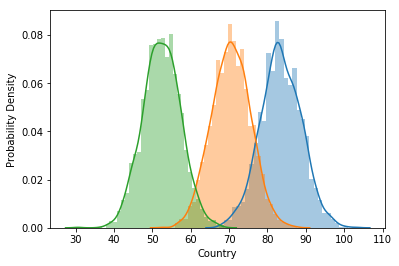

In [111]:
axes = selected.apply(sns.distplot)
axes[-1].set(xlabel='Country', ylabel='Probability Density')



In [112]:
from scipy import stats

[Text(0, 0.5, 'Probability Density'), Text(0.5, 0, 'Country')]

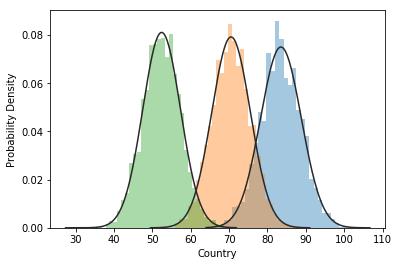

In [115]:
axes = selected.apply(sns.distplot, fit=stats.norm, kde=False)
axes[-1].set(xlabel='Country', ylabel='Probability Density')

[Text(0, 0.5, 'Life Expectancy'), Text(0.5, 0, 'Country')]

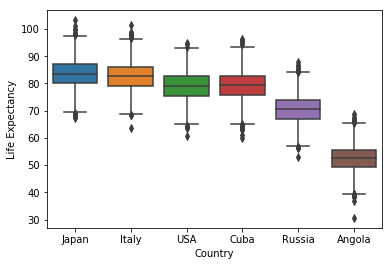

In [94]:
ax = sns.boxplot(data=dist)
ax.set(xlabel='Country', ylabel='Life Expectancy')

## Statistical tests


### Independent t-test
The independent t-test is also called the two sample t-test, student’s t-test, or unpaired t-test. It’s an univariate test that tests for a significant difference between the mean of two independent (unrelated) groups.

The hypothesis being tested is:

- Null hypothesis ($H_0$): $u_1 = u_2$, which translates to the mean of sample 1 is equal to the mean of sample 2
- Alternative hypothesis ($H_A$): $u_1 \neq u_2$, which translates to the mean of sample 1 is not equal to the mean of sample 2

To determine if there is a significant difference between two groups one must set a p-value before hand; if the test produces a p-value which is less than the set p-value then the test is said to be significant and that there is a significant difference between the two means. This means one rejects the null hypothesis in support of the alternative. Most commonly the p-value is set to 0.05.

#### T-test assumptions
Like every test, this inferential statistic test has assumptions. The assumptions that the data must meet in order for the test results to be valid are:

- The samples are independently and randomly drawn
- The distribution of the residuals between the two groups should follow the normal distribution
- The variances between the two groups are equal

If any of these assumptions are violated then another test should be used. The dependent variable (outcome being measured) should be continuous which is measured on an interval or ratio scale.

First I will check for homogeneity of variances. To do this, I will use Levene’s test for homogeneity of variance which is the `stats.levene()` method from scipy.stats

In [95]:
stats.levene(dist['Japan'], dist['Italy'])

LeveneResult(statistic=0.6923827168623452, pvalue=0.40540480865171147)

The test is not significant meaning there is homogeneity of variances and we can proceed. If the test were to be significant, a viable alternative would be to conduct a Welch’s t-test.

Next to test the assumption of normality. The residuals needs to be normally distributed. To calculate the residuals between the groups, subtract the values of one group from the values of the other group.

In [96]:
diff = dist['Japan'] - dist['Italy']

Checking for normality can be done visually or with a formula test. Visually, one can use a p-p plot, a q-q plot, or histogram, and/or one can use the Shapiro-Wilk test to formally test for normality. To test for normality formally, use `stats.shaprio()` which is from the `scipy.stats` library that was imported.

In place of a Q-Q plot, we will draw a probability plot, using `stats.probplot` from `scipy`.
This plots the theoretical quantiles (computed using the OSM formula) against the ordered values of the residuals.

((array([-3.392, -3.141, -3.002, ...,  3.002,  3.141,  3.392]),
  array([-23.608, -22.682, -21.371, ...,  24.216,  24.416,  28.002])),
 (7.551357605548732, 0.7782624639564751, 0.9997492132424072))

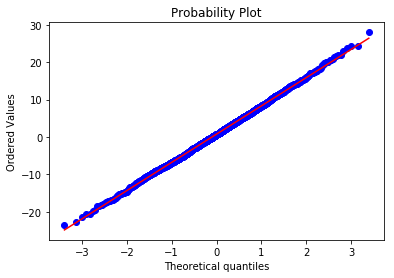

In [97]:
stats.probplot(diff, dist="norm", plot=plt)

Text(0.5, 0, 'Age (years)')

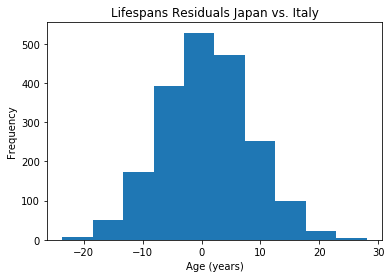

In [98]:
diff.plot(kind= "hist", title= "Lifespans Residuals Japan vs. Italy")
plt.xlabel("Age (years)")

Now for the formal test on normality.

In [99]:
stats.shapiro(diff)


(0.9994465708732605, 0.8579245805740356)

The output is not labeled, but the first value is the W test statistic and the second value is the p-value. Since the test statistic does not produce a significant p-value, the data is indicated to be normally distributed.
The data met all the assumptions for the t-test which indicates the results can be trusted and the t-test is an appropriate test to be used.

In [100]:
stats.ttest_ind(dist['Japan'], dist['Italy'])

Ttest_indResult(statistic=4.67039449573248, pvalue=3.1049633667475225e-06)

### ANOVA (One-way)
The analysis of variance (ANOVA) can be thought of as an extension to the t-test. The independent t-test is used to compare the means of a condition between 2 groups. ANOVA is used when one wants to compare the means of a condition between 2+ groups. ANOVA is an omnibus test, meaning it tests the data as a whole. Another way to say that is this, ANOVA tests if there is a difference in the mean somewhere in the model (testing if there was an overall effect), but it does not tell one where the difference is if the there is one. To find out where the difference is between the groups, one has to conduct post-hoc tests. This is also covered in this section.

The testing hypothesis of an ANOVA is as follows:

- $H_0$: No difference between means, i.e. $\bar{x_1} = \bar{x_2} = \bar{x_3}$
- $H_a$: Difference between means exist somewhere, i.e.$\bar{x_1} \neq \bar{x_2} \neq \bar{x_3}$, or $\bar{x_1} = \bar{x_2} \neq \bar{x_3}$, or $\bar{x_1} \neq \bar{x_2} = \bar{x_3}$

There are 3 assumptions that need to be met for the results of an ANOVA test to be considered accurate and trust worthy. It’s important to note the the assumptions apply to the residuals and not the variables themselves. The ANOVA assumptions are the same as for linear regression and are:

- Normality
    - Caveat to this is, if group sizes are equal, the F-statistic is robust to violations of normality
- Homogeneity of variance
    - Same caveat as above, if group sizes are equal, the F-statistic is robust to this violation
- Independent observations

If possible, it is best to have groups the same size so corrections to the data do not need to be made. However, with real world data, that is often not the case and one will have to make corrections to the data. If these assumptions are not met, and one does not want to transform the data, an alternative test that could be used is the Kruskal-Wallis H-test or Welch’s ANOVA.



There are a few ways ANOVA can be performed with Python. One is with the `stats.f_oneway()` method which is a part of the `scipy.stats` library, and the other is using `statsmodels`.



In [101]:
stats.f_oneway(dist['Japan'], dist['Cuba'], dist['USA'])

F_onewayResult(statistic=459.1548329482094, pvalue=2.8844661084642096e-186)

### Bonferroni Correction Post-hoc Comparison

Take the alpha the ANOVA was tested at, 0.05, then divide it by the number of planned comparisons. In this case, 0.05/3 = 0.0167. A post-hoc test would have to have an alpha level < 0.0167 to be considered significant. To test the groups, conduct multiple t-tests, but set the alpha value to the corrected value. This method is quick, but often considered too conservative.
First the corrected p-value needs to be calculated. This can be done using the formula:
$$ p-value/# of comparisons = 0.05/3 = 0.01667 $$
Now the t-tests that are conducted have to have a p-value less than 0.01667 in order to be considered significant.

In [102]:
stats.ttest_ind(dist['Japan'], dist['Cuba'])

Ttest_indResult(statistic=25.569332893640144, pvalue=1.0900081000210643e-133)

In [103]:
stats.ttest_ind(dist['Japan'], dist['USA'])

Ttest_indResult(statistic=26.63694203071096, pvalue=4.811086701063562e-144)

In [104]:
stats.ttest_ind(dist['USA'], dist['Cuba'])

Ttest_indResult(statistic=-1.230289206940622, pvalue=0.2186612076033066)